In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


In [4]:
from pmlb import fetch_data

X, y = fetch_data('294_satellite_image', return_X_y=True)

In [5]:
X.shape

(6435, 36)

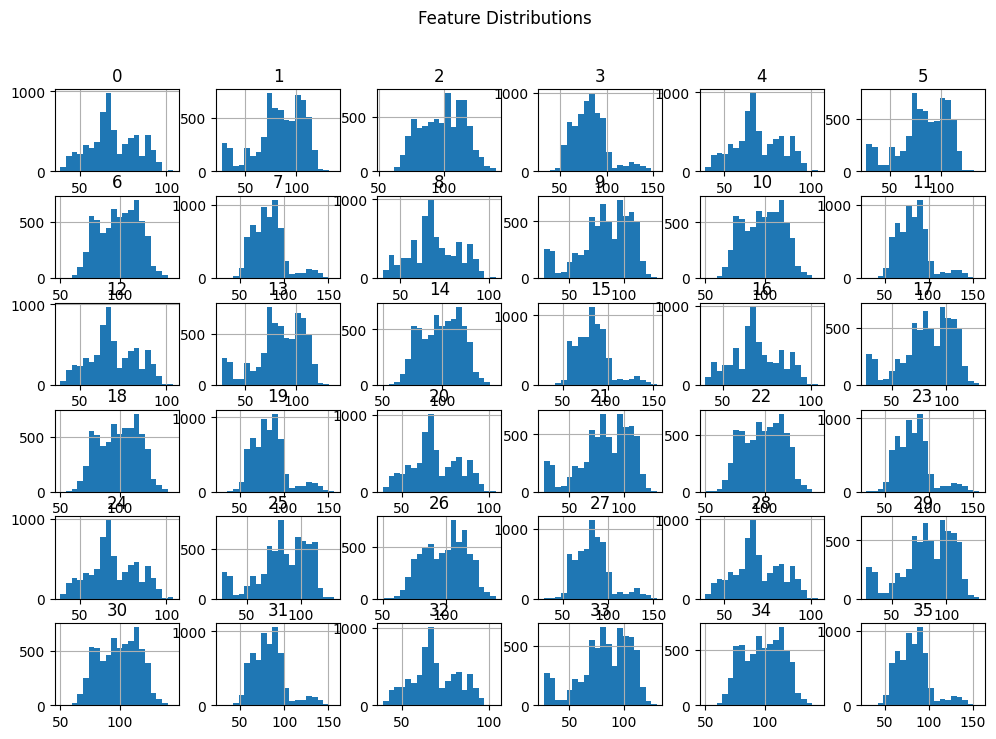

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_df = pd.DataFrame(X)
X_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

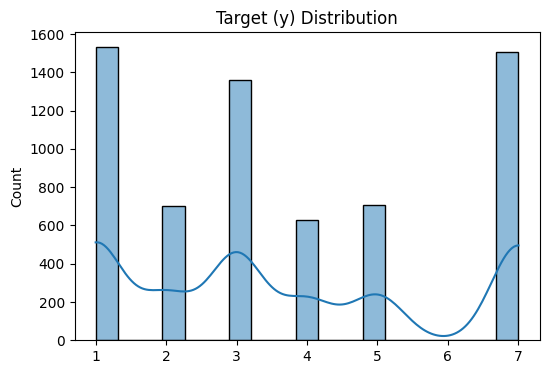

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

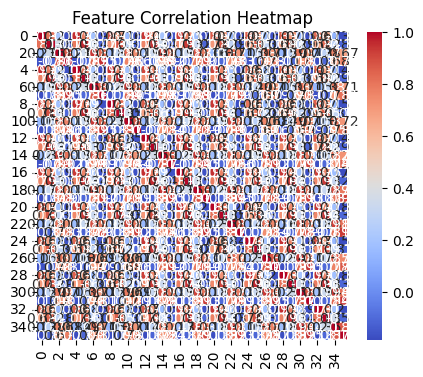

In [8]:
plt.figure(figsize=(5, 4))
corr = X_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
ndpost=1000
nskip=1000
n_trees=5

In [10]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=10, n_chains=4, ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.772540                 1.671504             1.926133   
1                  2.134465                 2.011661             2.396689   
2                  1.723906                 1.632684             1.622684   
3                  1.809771                 1.797978             2.074432   
4                  1.831410                 1.845391             1.930660   
5                  2.247691                 1.613600             1.999249   
6                  1.645563                 1.710283             2.305081   
7                  2.312981                 1.872545             1.670354   
8                  1.990524                 1.706025             1.903746   
9                  2.020743                 1.703777             1.896002   
mean               1.948959                 1.756545             1.972503   
std                0.228536              

In [11]:
rhat_df.to_csv("results/real7_Satellite_rhat.csv", index=False)

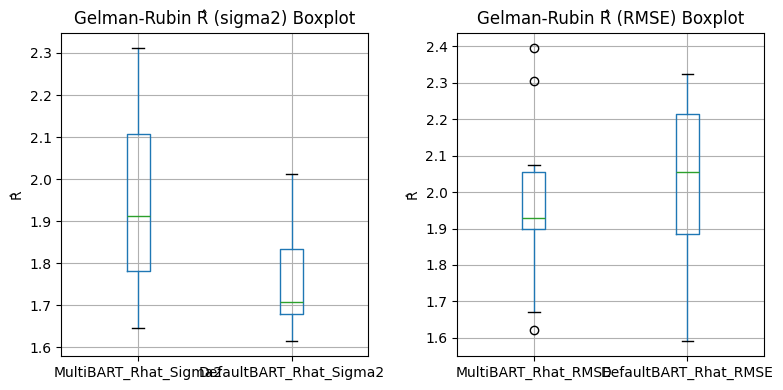

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-10-08 02:21:46,774:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 02:21:47,207:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 02:21:47,235:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
      bart_mtmh      bart       btz        rf       xgb
0      0.707421  0.749669  0.903653  0.619590  0.740606
1      0.678700  0.714110  1.007188  0.694991  0.768396
2      0.669568  0.703107  0.964358  0.620112  0.723463
3      0.718059  0.759900  0.922822  0.639577  0.809297
4      0.737440  0.672999  0.883293  0.586874  0.735196
5      0.778529  0.762011  0.937201  0.640472  0.779666
6      0.676798  0.739319  0.983517  0.661405  0.791952
7      0.686947  0.680579  0.986619  0.618123  0.741033
8      0.740412  0.730349  1.055949  0.708490  0.782722
9      0.715046  0.720240  1.064822  0.595078  0.739379
mean   0.710892  0.723228  0.970942  0.638471  0.761171
std    0.034499  0.031085  0.060978  0.039835  0.028910



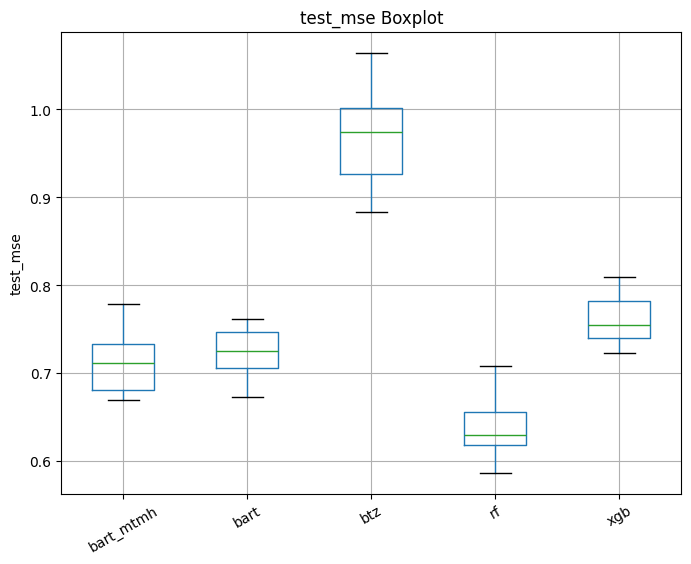

train_mse:
      bart_mtmh      bart       btz        rf       xgb
0      0.349367  0.491193  0.826685  0.133262  0.508322
1      0.341945  0.459311  0.888833  0.134795  0.494153
2      0.344290  0.489805  0.866128  0.152283  0.516179
3      0.308978  0.466404  0.755231  0.136867  0.496187
4      0.355706  0.477829  0.893240  0.138525  0.514775
5      0.387633  0.499880  0.835527  0.137240  0.521286
6      0.331791  0.492414  0.846586  0.146797  0.531751
7      0.343360  0.505093  0.920241  0.130559  0.516874
8      0.340506  0.472839  0.962092  0.140282  0.510404
9      0.340778  0.456147  0.911203  0.135292  0.527227
mean   0.344436  0.481091  0.870576  0.138590  0.513716
std    0.019638  0.017082  0.058113  0.006504  0.012075



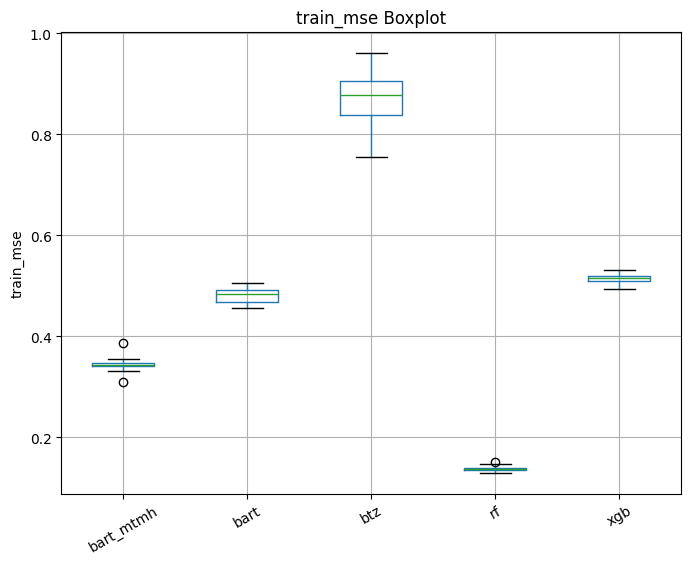

pi_length:
      bart_mtmh      bart       btz
0      2.541745  2.990608  3.935852
1      2.538919  2.892041  4.068208
2      2.498226  2.975340  3.991456
3      2.406944  2.945859  3.769860
4      2.597809  2.924329  3.959304
5      2.664875  2.972526  3.819894
6      2.481019  2.976254  3.998858
7      2.539317  3.011147  4.092605
8      2.528769  2.925513  4.226714
9      2.535004  2.873856  4.004356
mean   2.533263  2.948747  3.986711
std    0.067958  0.044277  0.130864



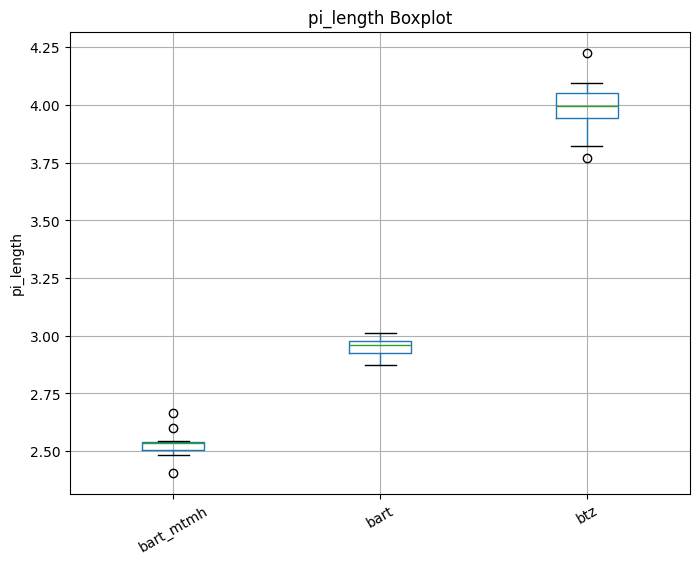

coverage:
      bart_mtmh      bart       btz
0      0.906774  0.914232  0.933499
1      0.902424  0.906774  0.921690
2      0.895587  0.916097  0.926663
3      0.897452  0.909882  0.924798
4      0.896209  0.912989  0.927284
5      0.886886  0.899938  0.921690
6      0.888751  0.901802  0.930392
7      0.894344  0.917961  0.924798
8      0.891237  0.907396  0.935364
9      0.893723  0.906153  0.918583
mean   0.895339  0.909323  0.926476
std    0.005977  0.005993  0.005355



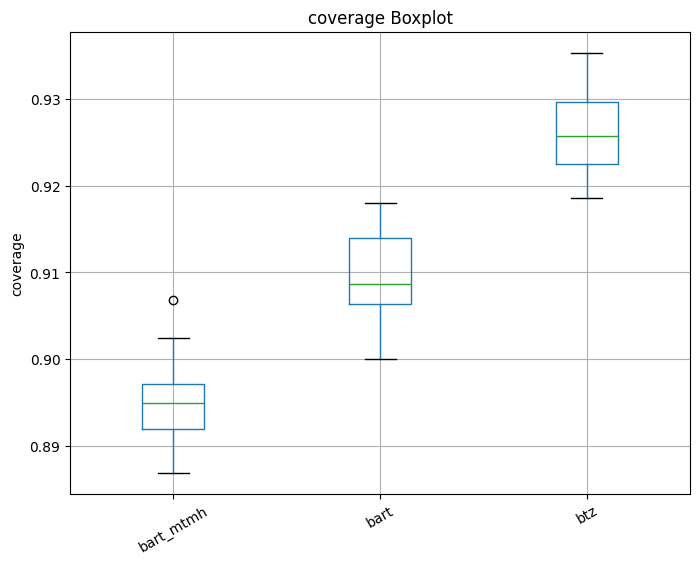

train_time:
      bart_mtmh      bart        btz        rf       xgb
0     67.126025  2.754399  11.370310  0.353652  0.096464
1     27.092545  3.968782  11.151907  0.331594  0.085994
2     21.963919  4.478977  10.547354  0.341949  0.086933
3     63.126481  3.043195  10.441003  0.357376  0.090082
4     29.054244  3.157071  11.360753  0.349017  0.086821
5     21.868647  3.233317  11.018292  0.331654  0.087252
6     22.190690  2.913872  10.384644  0.394744  0.090757
7     21.937259  2.740745  11.369490  0.354426  0.089016
8     22.736424  3.009259  11.600851  0.337826  0.096219
9     23.550492  3.132786  10.722963  0.340073  0.085903
mean  32.064673  3.243240  10.996757  0.349231  0.089544
std   17.617765  0.554567   0.442330  0.018473  0.003942



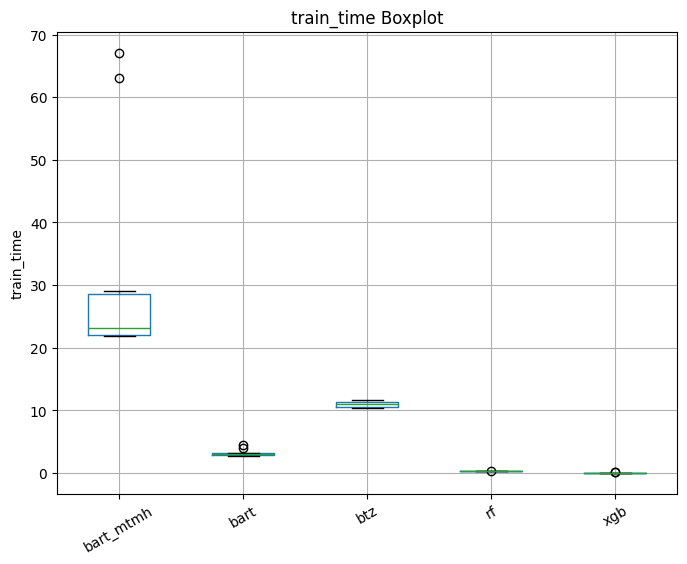

In [13]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=nskip, n_post=ndpost, n_trees=n_trees, n_jobs=-2)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [14]:
for k, v in mse_results.items():
    csv_name = f"results/real7_Satellite_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [15]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real7_Satellite_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1, 5, 10, 50, 100],
    n_runs=10, n_chains=4,
    ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real7_Satellite_tries.csv", index=False)

In [16]:
print(df)

   multi_tries  Rhat_Sigma2  Rhat_RMSE  Test_MSE  Coverage  Train_Time
0            1     1.897053   1.993862  0.718028  0.907707    7.655837
1            5     1.893728   2.217198  0.729914  0.900435   15.032792
2           10     1.948959   1.972503  0.706414  0.894220   32.134614
3           50     2.159400   2.229395  0.725133  0.875078  171.994604
4          100     2.201173   2.205269  0.767888  0.857676  438.785862
